<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Building and Running Quantum Circuits

The `QuantumCircuit`, `QuantumRegister`, and `ClassicalRegister` are the main objects for Qiskit Terra. Most users will be able to do all they want with these objects. 

In [87]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, Aer, IBMQ, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import noise

## Quantum and Classical Registers

Quantum and Classical Registers are declared using the following:

In [2]:
q0 = QuantumRegister(2, 'q0')
c0 = ClassicalRegister(2, 'c0')
q1 = QuantumRegister(2, 'q1')
c1 = ClassicalRegister(2, 'c1')
q_test = QuantumRegister(2, 'q0')

The name is optional. If not given, Qiskit will name it $qi$, where $i$ is an interger which will count from 0. The name and size can be returned using the following:

In [3]:
print(q0.name)
print(q0.size)

q0
2


You can test if the registers are the same or different. 

In [4]:
q0==q0

True

In [5]:
q0==q_test

True

In [6]:
q0==q1

False

## Quantum Circuits

Quantum Circuits are made using registers, which are created either when initiated or by using the `add_register` command. 

In [7]:
circ = QuantumCircuit(q0, q1)
circ.x(q0[1])
circ.x(q1[0])
circ.draw()

is the same as 

In [8]:
circ2 = QuantumCircuit()
circ2.add_register(q0)
circ2.add_register(q1)
circ2.x(q0[1])
circ2.x(q1[0])
circ2.draw()

<span class="badge badge-primary">Exercise 1.0</span> Try using tab autocomplete on a `QuantumCircuit` instance such as `circ` to see the available gates and operations on a quantum circuit.

<div class="alert alert-block alert-info">
<b>Note:</b> The registers are listed in the order they are initiated or added (**not** the tensor product for quantum registers).
</div>

In [9]:
from copy import deepcopy

q3 = QuantumRegister(2, 'q3')
circ3 = deepcopy(circ)
circ3.add_register(q3)
circ3.draw()

<div class="alert alert-block alert-info">
<b>Note:</b> The circuit drawer has the last register added at the bottom. If we add a new register it will add it to the bottom of the circuit. 
</div>

### Extending a circuit

In many situations you may have two circuits that you want to concatenate to form a new circuit. This is very useful when one circuit has no measurements, and the final circuit represents a measurement.  

In [10]:
meas = QuantumCircuit(q0, q1, c0, c1)
meas.measure(q0, c0)
meas.measure(q1, c1)

qc = circ + meas

qc.draw()

In [11]:
meas2 = QuantumCircuit()
meas2.add_register(q0)
meas2.add_register(q1)
meas2.add_register(c0)
meas2.add_register(c1)
meas2.measure(q0, c0)
meas2.measure(q1, c1)

qc2 = circ2 + meas2

qc2.draw()

It even works when the circuits have different registers. Let's start by making two new circuits:

In [12]:
circ4 = QuantumCircuit(q1)
circ4.x(q1)
circ4.draw()

In [13]:
circ5 = QuantumCircuit(q3)
circ5.h(q3)
circ5.draw()

The new register is added to the circuit:

In [14]:
(circ4+circ5).draw()

We have also overloaded `+=` to the `QuantumCircuit` object:

In [15]:
circ4 += circ5
circ4.draw()

## Outcomes of Quantum Circuits

In the circuit output, the most significant bit (MSB) is to the left, and the least significant bit (LSB) is to the right (i.e., we follow little-endian ordering from computer science). In this example:

In [16]:
circ.draw()

qubit register $Q_0$ is prepared in the state $|10\rangle$ and $Q_1$ is in the state $|01\rangle$, giving a total state $|0110\rangle$ ($Q1\otimes Q0$). 

<div class="alert alert-block alert-info">
<b>Note:</b> The tensor order in Qiskit goes as $Q_n \otimes .. Q_1 \otimes Q_0$
</div>

That is the four-qubit statevector of length 16, with the sixth element (`int('0110',2)=6`) being one. Note the element count starts from zero.

In [17]:
backend_sim = BasicAer.get_backend('statevector_simulator')
result = execute(circ, backend_sim).result()
state = result.get_statevector(circ)
print(state)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


We can also use Qiskit Terra to make the unitary operator representing the circuit (provided there are no measurements). This will be a $16\otimes16$ matrix equal to $I\otimes X\otimes X\otimes I$.

In [19]:
backend_sim = BasicAer.get_backend('unitary_simulator')
result = execute(circ, backend_sim).result()
unitary = result.get_unitary(circ)
print(unitary)

(1+0j)

To map the information of the quantum state to the classial world, we use the example with measurements `qc`:

In [20]:
qc.draw()

This will map the quantum state to the classical world. Since the state has no superpositions, it will be deterministic and equal to `'01 10'`.  Here a space is used to separate the registers.

In [21]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend_sim).result()
counts = result.get_counts(qc)
print(counts)

{'01 10': 1024}


To show that it does not matter how you add the registers, we run the same as above on the second example circuit:

In [22]:
backend_sim = BasicAer.get_backend('statevector_simulator')
result = execute(circ2, backend_sim).result()
states = result.get_statevector(circ2)

backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(qc2, backend_sim, shots=1024).result()
counts = result.get_counts(qc2)

backend_sim = BasicAer.get_backend('unitary_simulator')
result = execute(circ2, backend_sim, shots=1024).result()
unitary = result.get_unitary(circ2)

In [23]:
print(counts)

{'01 10': 1024}


## Aer vs BasicAer

`BasicAer` and `Aer` are simulator `Provider`s in the sameway that `IBMQ` is a provider for our physical devices. `Aer` is a high-performance C++ provider, whereas `BasicAer` is implemented in Python

<span class="badge badge-primary">Exercise 1.1</span> Try comparing the results of a random quantum circuit with ~1000 gates executed with both `Aer` and `BasicAer` for 14 qubits. The rough steps to this are

1. Import the required simulators from `BasicAer` and `Aer`.
2. Create your `QuantumRegister`, `ClassicalRegister` and `QuantumCircuit`
3. Add 1000 gates at random
4. Submit the job and ask for the result. We encourage you to time the results.
5. Get the counts from the results and compare them.

In [115]:
n_qubits = 14
n_gates = 1000

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits)
qc_benchmark = QuantumCircuit(qr, cr)

for i in range(n_gates):
    random_qubit = np.random.randint(0, n_qubits)
    qc_benchmark.x(qr[random_qubit])

qc_benchmark.measure(qr, cr)


print('BasicAer')
%time basicaer_result = execute(qc_benchmark, basicaer_backend_sim).result()
print(basicaer_result.get_counts(qc_benchmark))
print('Aer')
%time aer_result = execute(qc_benchmark, aer_backend_sim).result()
print(aer_result.get_counts(qc_benchmark))

BasicAer
CPU times: user 1.06 s, sys: 13.4 ms, total: 1.08 s
Wall time: 1.08 s
{'01100100001110': 1024}
Aer
CPU times: user 516 ms, sys: 21.6 ms, total: 538 ms
Wall time: 465 ms
{'01100100001110': 1024}


It should not surprise you that the results of both experiments are identical since only perfect `x` gates were simulated. The Aer simulator is faster and this difference will only be enhanced for longer circuits with more qubits.

## Running on a real quantum computer

Before we start running on a real device we have to cover some of the preliminaries. At IBM Q we access our quantum computers through the cloud. This allows our experimentalist to sit in their cozy offices and run experiments on cutting edge hardware through their keyboard. It also means they have may have to share the device with other users. There are therefore a couple steps to running a job that we glossed over above.

First it calls `transpile` which will optimize your circuit for the device and return this new optimized but logically equivalent circuit

transpiled_circ = transpile(circ, melbourne_backend)

Next it assembles the circuit into a Qobj, which will be sent over the internet to the device

In [ ]:
qobj = assemble(transpiled_circ, melbourne_backend)

The qobj is a universal format, so it can be sent to any device that has the required properties. In this case we will send it to the simulator so as not to waste valuable device time. The backend returns a `Job` object.

In [ ]:
job = backend_sim.run(qobj)

The job has a unique `job_id` which the API keeps track of

In [70]:
basicaer_backend_sim = BasicAer.get_backend('qasm_simulator')
aer_backend_sim = Aer.get_backend('qasm_simulator')

n_qubits = 14
n_gates = 1000

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits)
qc_benchmark = QuantumCircuit(qr, cr)

for i in range(n_gates):
    random_qubit = np.random.randint(0, n_qubits)
    qc_benchmark.x(qr[random_qubit])

qc_benchmark.measure(qr, cr)

print('Basic Aer')
%time basic_aer_counts = execute(qc_benchmark, basicaer_backend_sim).result().get_counts(qc_benchmark)

print('Aer')
%time aer_counts = execute(qc_benchmark, aer_backend_sim).result().get_counts(qc_benchmark)

print(basic_aer_counts)
print(aer_counts)

Basic Aer
CPU times: user 1.34 s, sys: 22.8 ms, total: 1.36 s
Wall time: 1.39 s
Aer
CPU times: user 553 ms, sys: 28.8 ms, total: 582 ms
Wall time: 511 ms
{'11000001000001': 1024}
{'11000001000001': 1024}


In [ ]:
job.job_id()

We can also track the status of the job

In [ ]:
job.status()

And finally we can ask for the job result which will block until completion

In [ ]:
result = job.result()

## Real device results

<span class="badge badge-primary">Exercise 1.2</span> Now take the same circuit and run it on the real device, `ibmq_16_melbourne`. And also create a circuit with only 20 gates and four qubits and run this as well. 

Remember to load your credentials with the `IBMQ` provider and to grab a handle to the backend `ibmq_16_melbourne`. Using `IBMQ.get_backend`.

<div class="alert alert-block alert-info">
<b>Note:</b> You can run both circuits at once by providing them as a list to 'execute', ie., 'execute([qc1, qc2], backend, ...)'.
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> This may take a while if everyone sends their jobs at once.
</div>

In [77]:
IBMQ.load_accounts()
melbourne_backend = IBMQ.get_backend('ibmq_16_melbourne')

n_qubits = 4
n_gates = 20

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc_benchmark_20 = QuantumCircuit(qr, cr)

for i in range(n_gates):
    random_qubit = np.random.randint(0, n_qubits)
    qc_benchmark_20.x(qr[random_qubit])

qc_benchmark_20.measure(qr, cr)


print('Simulation')
%time sim_result = execute([qc_benchmark, qc_benchmark_20], basicaer_backend_sim).result()
print('Melbourne')
%time melbourne_result = execute([qc_benchmark, qc_benchmark_20], melbourne_backend).result()

sim_counts_1000 = sim_result.get_counts(qc_benchmark)
sim_counts_20 = sim_result.get_counts(qc_benchmark_20)

melbourne_counts_1000 = melbourne_result.get_counts(qc_benchmark)
melbourne_counts_20 = melbourne_result.get_counts(qc_benchmark_20)

Simulation
CPU times: user 59.5 ms, sys: 45.4 ms, total: 105 ms
Wall time: 215 ms
Melbourne
CPU times: user 1.45 s, sys: 132 ms, total: 1.58 s
Wall time: 5min 23s


<span class="badge badge-primary">Exercise 1.3</span> Compare the physical device results to the ideal simulation. You can use the `plot_histogram` method to better visualize the results. What about for the experiment with only four qubits and twenty gates?

<div class="alert alert-block alert-info">
<b>Note:</b> Use 'help' to get more information on how to use 'plot_histogram'. Try playing with the 'number_to_keep' option.
</div>

- What do you see? 
- Why do you think the results differ? 
- Are some gates worse than others?
- Why do we even bother trying to build a quantum computer if the results are so bad?

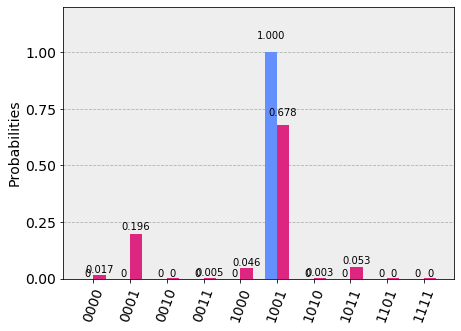

In [78]:
plot_histogram([sim_counts_1000, melbourne_counts_1000])

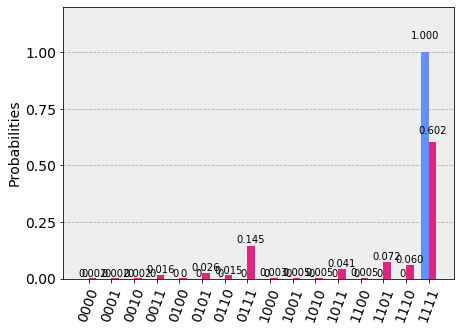

In [79]:
plot_histogram([sim_counts_20, melbourne_counts_20])

As we can the real device is much different from the ideal expected result. This is due to a variety of noisy sources on the device such as T1 and T2 errors, in-perfect gates and measurement errors to name a few. Building a quantum computer is **very** hard and there are stil many engineering challenges that must be overcome. However there is hope that we can overcome these noisy qubits with quantum error correction and noise-tolerant hybrid quantum-classical algorithms.

## Simulating Noise

From the experiments on the device it is clear that there is a lot of noise present. As an experimentalist it is important to understand this noise and how it will affect our quantum algorithms. As we noted in an earlier lecture the device returns this information in `backend.properties` and the `Aer` can use this to build a noise model which will allow it to simulate our circuit on a noisy device.

Below we provide gate times for the melbourne device

In [88]:
gate_times = [
    ('u1', None, 0), ('u2', None, 100), ('u3', None, 200),
    ('cx', [1, 0], 678), ('cx', [1, 2], 547), ('cx', [2, 3], 721),
    ('cx', [4, 3], 733), ('cx', [4, 10], 721), ('cx', [5, 4], 800),
    ('cx', [5, 6], 800), ('cx', [5, 9], 895), ('cx', [6, 8], 895),
    ('cx', [7, 8], 640), ('cx', [9, 8], 895), ('cx', [9, 10], 800),
    ('cx', [11, 10], 721), ('cx', [11, 3], 634), ('cx', [12, 2], 773),
    ('cx', [13, 1], 2286), ('cx', [13, 12], 1504), ('cx', [], 800)
]

In [90]:
properties = melbourne_backend.properties()

In [93]:
configuration = melbourne_backend.configuration()

In [92]:
noise_model = noise.device.basic_device_noise_model(properties, gate_times=gate_times)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['measure', 'u2', 'u3', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
  Specific qubit errors: [('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u2', [5]), ('u2', [6]), ('u2', [7]), ('u2', [8]), ('u2', [9]), ('u2', [10]), ('u2', [11]), ('u2', [12]), ('u2', [13]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('u3', [5]), ('u3', [6]), ('u3', [7]), ('u3', [8]), ('u3', [9]), ('u3', [10]), ('u3', [11]), ('u3', [12]), ('u3', [13]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [2, 3]), ('cx', [4, 3]), ('cx', [4, 10]), ('cx', [5, 4]), ('cx', [5, 6]), ('cx', [5, 9]), ('cx', [6, 8]), ('cx', [7, 8]), ('cx', [9, 8]), ('cx', [9, 10]), ('cx', [11, 3]), ('cx', [11, 10]), ('cx', [11, 12]), ('cx', [12, 2]), ('cx', [13, 1]), ('cx', [13, 12]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4]), ('measure', [5]), ('measure', [6]), 

In [100]:
noisy_test_result = execute(qc, aer_backend_sim,
                            noise_model=noise_model,
                            coupling_map=configuration.coupling_map,
                            basis_gates=configuration.basis_gates).result()

noisy_test_counts = noisy_test_result.get_counts(qc)

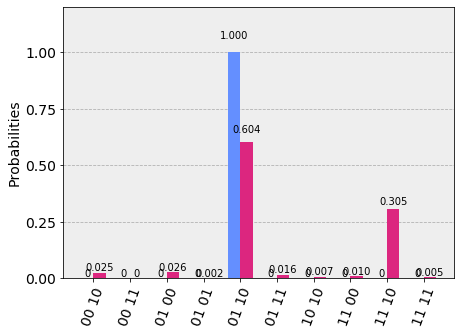

In [101]:
plot_histogram([counts, noisy_test_counts])

<span class="badge badge-primary">Exercise 1.4</span> Compare the results of the simulation with noise for your 1000 and 20 qubit circuits to the real device results. Is it better or worse? What do you think accounts for this difference?

In [112]:
print('Noisy Simulation')
%time noisy_sim_result = execute([qc_benchmark, qc_benchmark_20], aer_backend_sim, noise_model=noise_model, coupling_map=configuration.coupling_map, basis_gates=configuration.basis_gates).result()

noisy_sim_counts_1000 = noisy_sim_result.get_counts(qc_benchmark)
noisy_sim_counts_20 = noisy_sim_result.get_counts(qc_benchmark_20)

Noisy Simulation
CPU times: user 570 ms, sys: 108 ms, total: 679 ms
Wall time: 420 ms


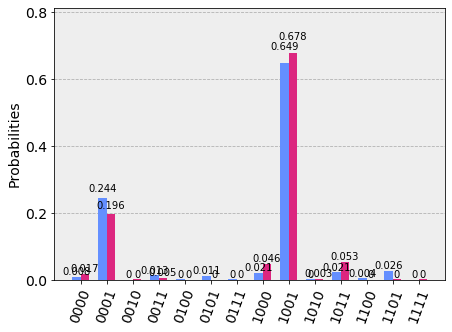

In [114]:
plot_histogram([noisy_sim_counts_1000, melbourne_counts_1000])

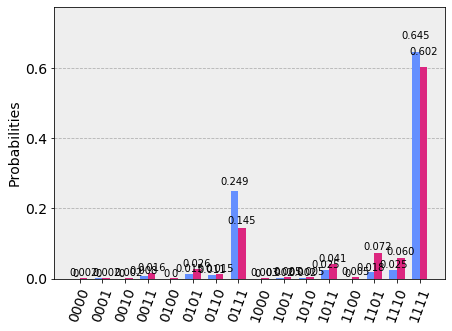

In [113]:
plot_histogram([noisy_sim_counts_20, melbourne_counts_20])

We observe that the noisy simulation results are in close agreement with the results we observed on our device. This means we at least understand *some* of the error. Note that since we only used `x` gates we did not generate entanglement (outside of unintended device errors) which is where many of the more complicated device errors can manifest themselves.

## Take away point

State of the art quantum computers are very imperfect. They are noisy, have limited numbers of qubits and imperfect gates. We are still in the infancy of quantum computing.

Don't despair! This means that there is still lots of room for your to make research and engineering breakthroughs!